In [1]:
import gizeh as gz
import requests
import json
from json.decoder import JSONDecodeError
from IPython.display import Image

# Parameters

In [2]:
param = "PV-voltage"
baseURL = 'http://solarprotocol.net/api/v2/opendata.php?value='
offLineData = "../../data/0-single-value.json"

ccValue = "PV-voltage"

Pi = 3.14

L = 1000 # Image dimension


# Functions

In [3]:
def getCCData(ccValue):
    try:
        x = requests.get(baseURL+ccValue,timeout=5)
        print("API charge controller data:")
        print(x.text)
        x.json()
        return json.loads(x.text)
    except JSONDecodeError as errj:
        print("A JSON decode error:" + repr(errj))
    except requests.exceptions.HTTPError as errh:
        print("An Http Error occurred:" + repr(errh))
    except requests.exceptions.ConnectionError as errc:
        print("An Error Connecting to the API occurred:" + repr(errc))
    except requests.exceptions.Timeout as errt:
        print("A Timeout Error occurred:" + repr(errt))
    except requests.exceptions.RequestException as err:
        print("An Unknown Error occurred" + repr(err))

# Get data

Possible data:

    PV-current
    PV-current
    PV-power-H
    PV-power-L
    PV-voltage
    battery-percentage
    battery-voltage
    charge-current
    charge-power-H
    charge-power-L
    load-current
    load-power
    load-voltage
    datetime
    scaled-wattage


In [4]:
getResult = getCCData("battery-percentage")   

API charge controller data:
{"battery-percentage":"1.0"}


# Get values from data

In [5]:
name = list(getResult.keys())[0]
param = float(list(getResult.values())[0])
string_param = list(getResult.values())[0]
name

'battery-percentage'

In [6]:
param

1.0

# Initialiste the surface

In [7]:
surface = gz.Surface(L,L, bg_color=(255,255,233))

# Draw the text

In [125]:


txt2 = gz.text(name, fontfamily="serif",  fontsize=20, fill=(0,0,0), xy=(500,80), angle=0/12)
txt2.draw(surface)
txt2

circle = gz.circle(r=param*100, xy= [500,500], fill=(250,250,250), stroke_width= 2)
circle.draw(surface)
circle

txt = gz.text(string_param, fontfamily="serif",  fontsize=20, fill=(0,0,0), xy=(500,500), angle=0/12)
txt.draw(surface)
txt

# Save

In [126]:
surface.write_to_png("single-value.png")

# Display

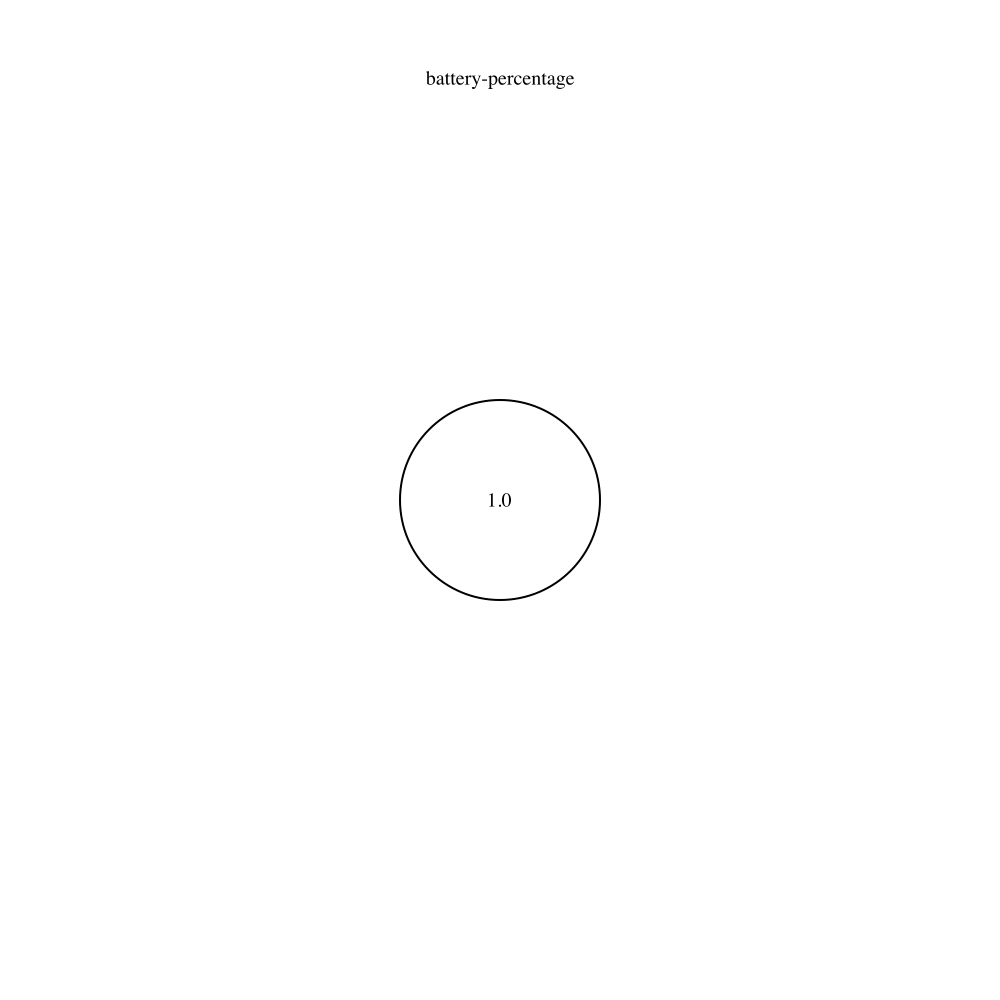

In [127]:
Image(filename='single-value.png') 

Made by Guillaume Slizewicz during Fiber Natural Intelligences lab